In [1]:
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
#K.set_image_dim_ordering('th')
from keras.utils import to_categorical
#from sklearn.cross_validation import StratifiedKFold

In [2]:
PATH = os.getcwd()
print (PATH)

C:\Users\tasni\Desktop\STUDY\GL4\SEM2\ProjectTI\Spectral_Images_Processing


In [3]:
# Load the Global values (windowSize, numPCAcomponents, testRatio) from the text file global_variables.txt
myFile = open('global_variables.txt', 'r') 
file = myFile.readlines()[:]


for line in file:

    if line[0:3] == "win":

        ds = line.find('=')
        windowSize = int(line[ds+1:-1],10)

    elif line[0:3] == "num":

        ds = line.find('=')
        numPCAcomponents = int(line[ds+2:-1],10)

    else:

        ds = line.find('=')
        testRatio = float(line[ds+1:])


In [4]:
# Global Variables
#windowSize = 5
#numPCAcomponents = 30
#testRatio = 0.25

# Load Training Dataset

In [5]:
X_train = np.load("X_trainPatches_" + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio)  + ".npy")

y_train = np.load("y_trainPatches_" + str(windowSize) + "PCA" + str(numPCAcomponents) + "testRatio" + str(testRatio) + ".npy")

In [6]:
# Reshape into (numberofsamples, channels, height, width)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[3], X_train.shape[1], X_train.shape[2]))

In [7]:
# convert class labels to on-hot encoding
y_train = to_categorical(y_train)

In [8]:
# Define the input shape 
input_shape= X_train[0].shape
print(input_shape)

(30, 5, 5)


In [9]:
# number of filters
C1 = 3*numPCAcomponents #90

In [10]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(6*numPCAcomponents, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

C:\Users\tasni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 3, 32)           │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 1, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 180)                 │         299,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,564 (1.23 MB)

 Trainable params: 322,564 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
sgd = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
history= model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.0890 - loss: 2.7817
Epoch 2/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3444 - loss: 2.2444
Epoch 3/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5203 - loss: 1.6149
Epoch 4/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6172 - loss: 1.1973
Epoch 5/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6789 - loss: 0.9674
Epoch 6/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7140 - loss: 0.8373
Epoch 7/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7384 - loss: 0.7518
Epoch 8/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7554 - loss: 0.6956
Epoch 9/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7795 - loss: 0.6369
Epoch 10/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7893 - loss: 0.5932
Epoch 11/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8007 - loss: 0.5653
Epoch 12/50
928/928 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/st

Text(0.5, 1.0, 'Training Accuracy')

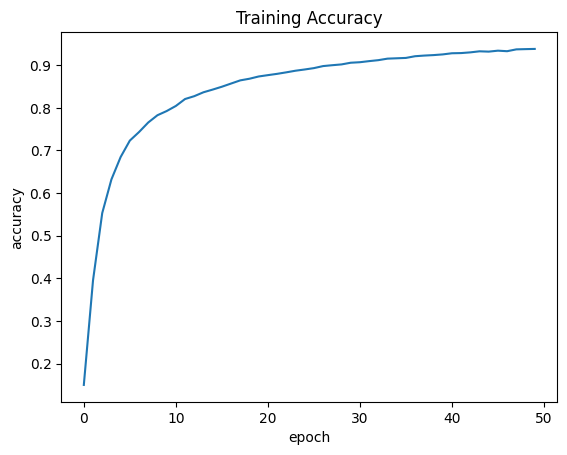

In [14]:
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training Accuracy")

In [15]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)

# Print or use the metrics as needed
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)


928/928 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9696 - loss: 0.0983
Training Loss: 0.09768185764551163
Training Accuracy: 0.9706586003303528


In [111]:
import h5py
from keras.models import load_model

In [112]:
model.save('my_model' + str(windowSize) + 'PCA' + str(numPCAcomponents) + "testRatio" + str(testRatio)+'.keras')